In [1]:
%matplotlib inline
# import required libraries
import random
import datetime 
import numpy as np
import pandas as pd
from random import randrange

import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('talk')

params = {'legend.fontsize': 'small',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}

plt.rcParams.update(params)

from IPython.display import display, HTML

In [2]:
df=pd.read_csv('train_1.csv')

In [4]:
df.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'premium', 'renewal'],
      dtype='object')

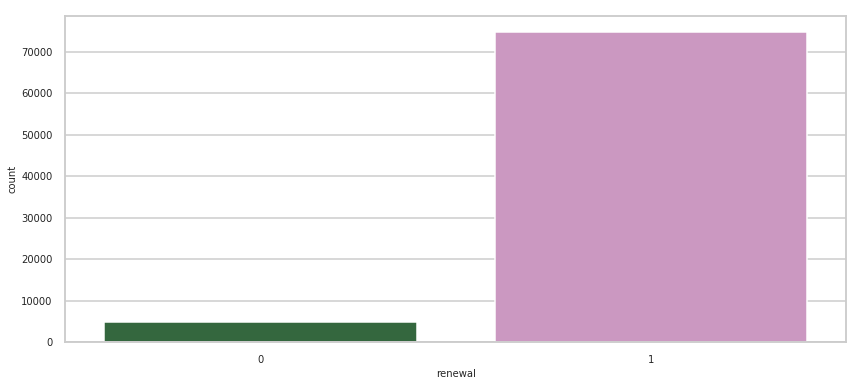

In [6]:
plt.rcParams['figure.figsize'] = (14.0,6.0)
sns.countplot(x='renewal',data=df,palette="cubehelix")
#this shows an imbalance in our classes, suggesting we will need
#to be carefull when performing CV (Stratified).

Text(0.5,0,'Income')

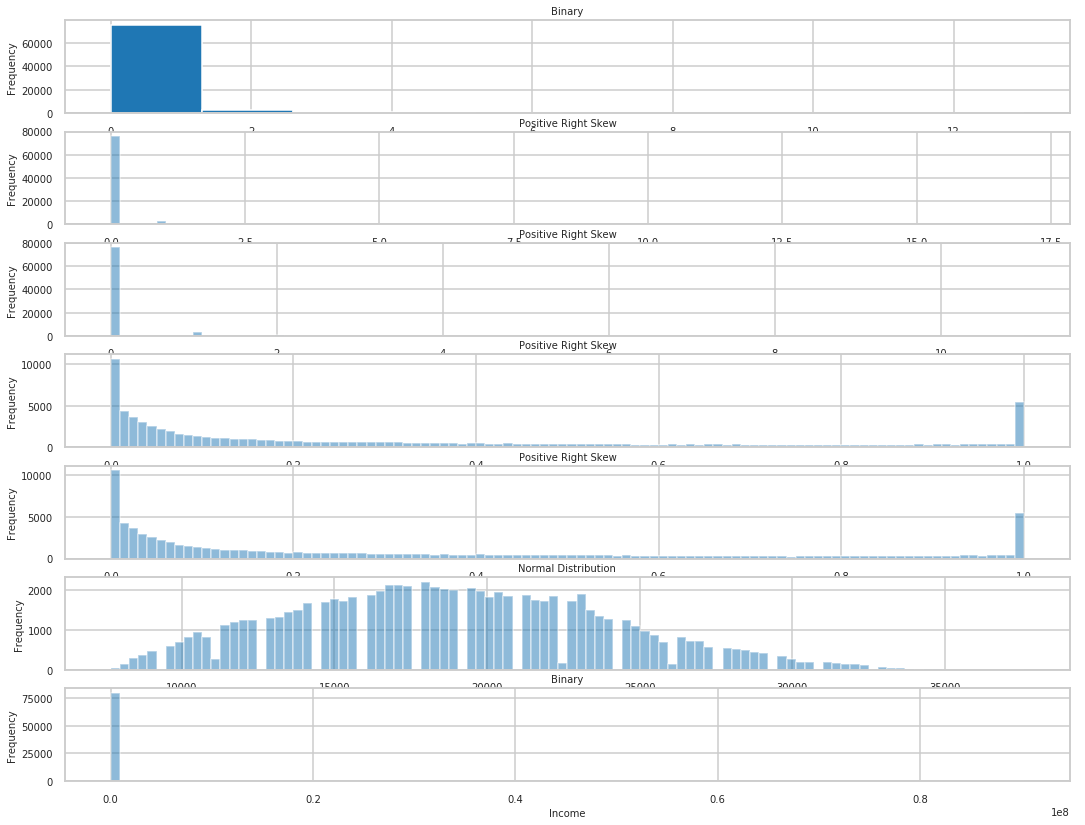

In [13]:
"""Here we can see that amongst our Features, we have a number of different
distributions.
This is to be expected amongst  Insurance data due to the breadth of
different metrics we have gathered
 """        
plt.rcParams['figure.figsize'] = (18.0, 14.0)

plt.subplot(7,1,1)    
df['Count_3-6_months_late'].plot(kind = 'hist')
plt.title('Binary')
plt.xlabel('Count_3-6_months_late')

plt.subplot(7,1,2)
df['Count_6-12_months_late'].plot(kind = 'hist',bins = 100, alpha = 0.5)
plt.title('Positive Right Skew')
plt.xlabel('Count_6-12_months_late')

plt.subplot(7,1,3)
df['Count_more_than_12_months_late'].plot(kind = 'hist', bins =100, alpha = 0.5)
plt.title('Positive Right Skew')
plt.xlabel('Count_more_than_12_months_late')

plt.subplot(7,1,4)
df['perc_premium_paid_by_cash_credit'].plot(kind = 'hist', bins =100, alpha = 0.5)
plt.title('Positive Right Skew')
plt.xlabel('perc_premium_paid_by_cash_credit')

plt.subplot(7,1,5)
df['perc_premium_paid_by_cash_credit'].plot(kind = 'hist', bins =100, alpha = 0.5)
plt.title('Positive Right Skew')
plt.xlabel('perc_premium_paid_by_cash_credit')

plt.subplot(7,1,6)
df['age_in_days'].plot(kind = 'hist', bins =100, alpha = 0.5)
plt.title('Normal Distribution')
plt.xlabel('age_in_days')

plt.subplot(7,1,7)
df['Income'].plot(kind = 'hist', bins =100, alpha = 0.5)
plt.title('Binary')
plt.xlabel('Income')


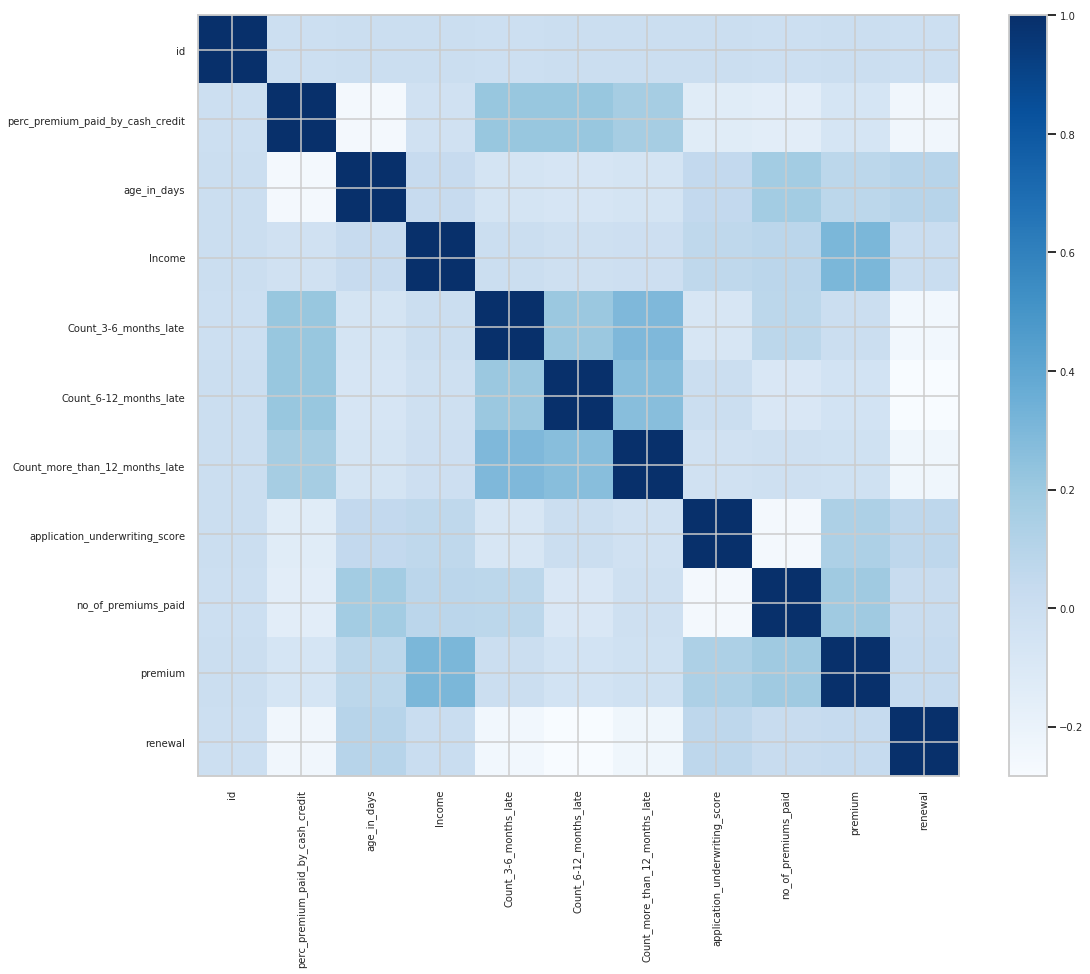

In [23]:
#Look at correlation between continuous varaibles
cont_data=df.select_dtypes(include=[np.number])
plt.imshow(cont_data.corr(),cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
tick_marks=[i for i in range(len(cont_data.columns))]
plt.xticks(tick_marks,cont_data.columns,rotation='vertical')
plt.yticks(tick_marks,cont_data.columns)
plt.show()

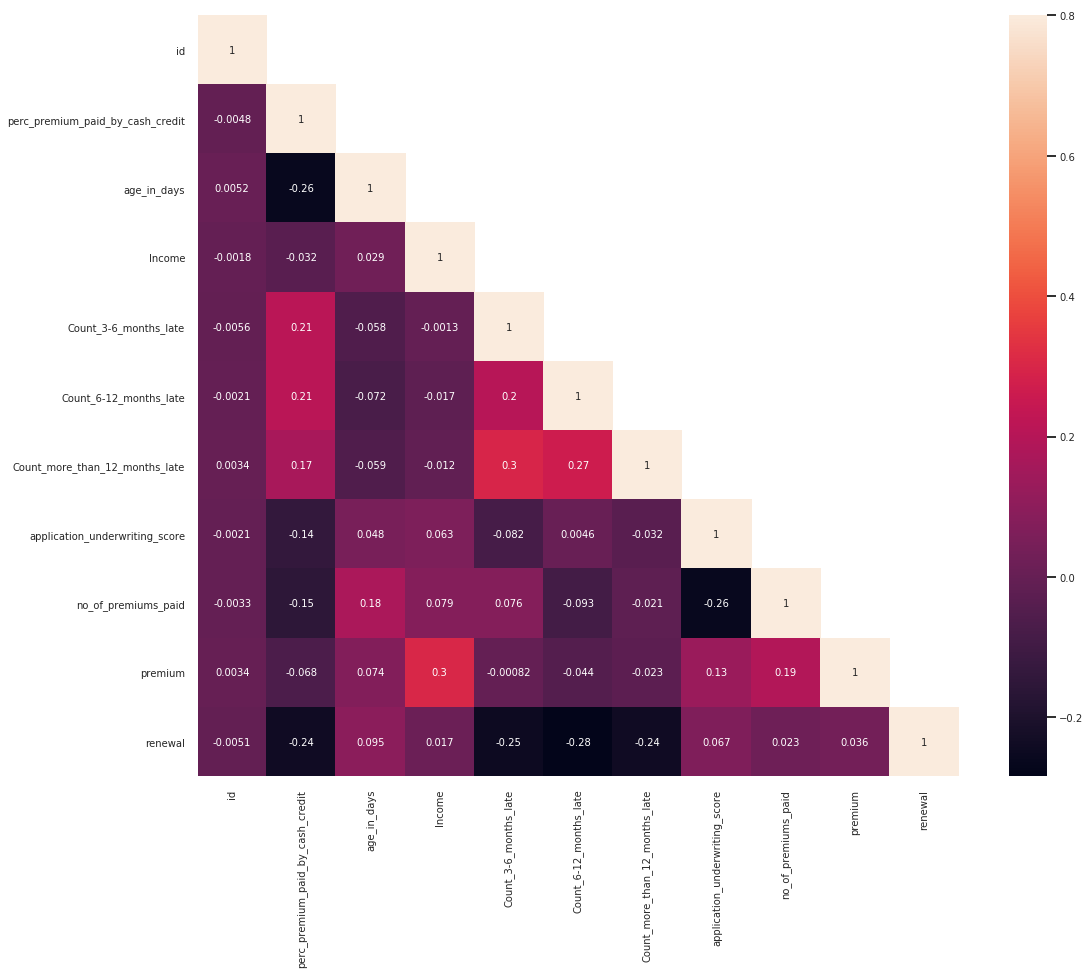

In [30]:
corrMatt = df.select_dtypes(include=[np.number]).corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrMatt, mask=mask,
           vmax=.8, square=True,annot=True)

In [18]:
df.corr()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,renewal
id,1.000000,-0.004833,0.005184,-0.001798,-0.005643,-0.002117,0.003429,-0.002085,-0.003328,0.003430,-0.005064
perc_premium_paid_by_cash_credit,-0.004833,1.000000,-0.259131,-0.031868,0.213011,0.213953,0.167213,-0.138006,-0.152837,-0.067523,-0.240980
age_in_days,0.005184,-0.259131,1.000000,0.029308,-0.057874,-0.072439,-0.059114,0.047954,0.176544,0.074070,0.095103
Income,-0.001798,-0.031868,0.029308,1.000000,-0.001296,-0.017292,-0.012341,0.062637,0.079078,0.302825,0.016541
Count_3-6_months_late,-0.005643,0.213011,-0.057874,-0.001296,1.000000,0.204286,0.296139,-0.082306,0.076435,-0.000819,-0.246469
Count_6-12_months_late,-0.002117,0.213953,-0.072439,-0.017292,0.204286,1.000000,0.266337,0.004581,-0.092593,-0.043642,-0.284034
Count_more_than_12_months_late,0.003429,0.167213,-0.059114,-0.012341,0.296139,0.266337,1.000000,-0.031527,-0.021409,-0.023462,-0.238482
application_underwriting_score,-0.002085,-0.138006,0.047954,0.062637,-0.082306,0.004581,-0.031527,1.000000,-0.262585,0.132775,0.067333
no_of_premiums_paid,-0.003328,-0.152837,0.176544,0.079078,0.076435,-0.092593,-0.021409,-0.262585,1.000000,0.191889,0.022664
premium,0.003430,-0.067523,0.074070,0.302825,-0.000819,-0.043642,-0.023462,0.132775,0.191889,1.000000,0.036416


In [20]:
df_numerics_only = df.select_dtypes(include=[np.number])

In [21]:
df_numerics_only.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,renewal
0,110936,0.429,12058,355060,0,0,0,99.02,13,3300,1
1,41492,0.010,21546,315150,0,0,0,99.89,21,18000,1
2,31300,0.917,17531,84140,2,3,1,98.69,7,3300,0
3,19415,0.049,15341,250510,0,0,0,99.57,9,9600,1
4,99379,0.052,31400,198680,0,0,0,99.87,12,9600,1


In [22]:
#Calculate the skew of continuous variables
from scipy.stats import skew
skewed_features=df_numerics_only.apply(lambda x: skew(x))
print("skew in numerical features")
print(skewed_features)

skew in numerical features
id                                   -0.004028
perc_premium_paid_by_cash_credit      0.892906
age_in_days                           0.222568
Income                              109.759110
Count_3-6_months_late                 4.152837
Count_6-12_months_late               10.359439
Count_more_than_12_months_late        7.854975
application_underwriting_score       -2.808846
no_of_premiums_paid                   1.226614
premium                               2.198137
renewal                              -3.611615
dtype: float64


In [28]:
# cont_col_names=df.select_dtypes(include=[np.number]).columns
# #Visualize the continuous data using violin plots from seaborn and matplotlib#Visual 
# import matplotlib.pyplot as plt
# import seaborn as sns
# n_cols=2
# n_rows=7
# for i in range(n_rows):
#     fg,ax=plt.subplots(nrows=1,ncols=n_cols,figsize=(12,8))
#     for j in range(n_cols):
#         sns.violinplot(y=cont_col_names[i*n_cols+j],data=cont_data,ax=ax[j])
# plt.show()

In [ ]:
df.columns